### Import Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression
import seaborn
seaborn.set()

## Loading the data

In [4]:
raw_data = pd.read_csv("Cars On Sale.csv")

## pandas drop method

In [7]:
data = raw_data.drop(columns=["Model"], axis=1)
data.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


Brand, Body, Mileage, Engine Type, Registration and Year all have 4345 values, but the rest has less.

In [10]:
# "isnull" method creates a dataframe with same rows and columns, only having values true if the cell is null and false if otherwise.

In [12]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [16]:
data_no_missing_value = data.dropna(axis=0)
data_nmv = data_no_missing_value

In [55]:
data_nmv.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


## Numerical Value Distributions

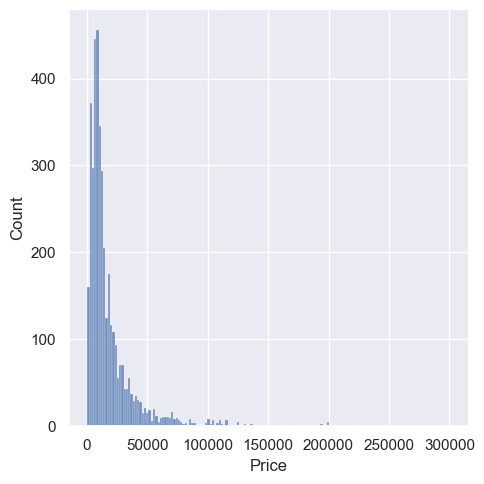

In [64]:
seaborn.displot(data_nmv["Price"])

The max. value is very likely to effect the regression, so outliers should be generally removed.

The instructor tells that they take the left 99% in this distribution.

In [67]:
q = data_nmv["Price"].quantile(0.99)
q

129812.51999999981

In [71]:
data_1 = data_nmv[data_nmv["Price"]<q]
data_1.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


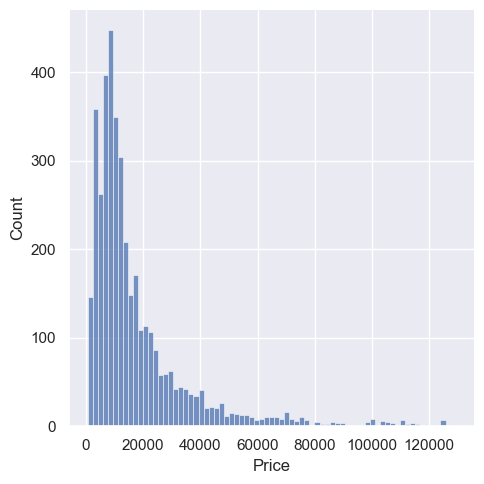

In [75]:
seaborn.displot(data_1["Price"])

In other numerical categories, repeat the same actions, i.e. remove the outliers.

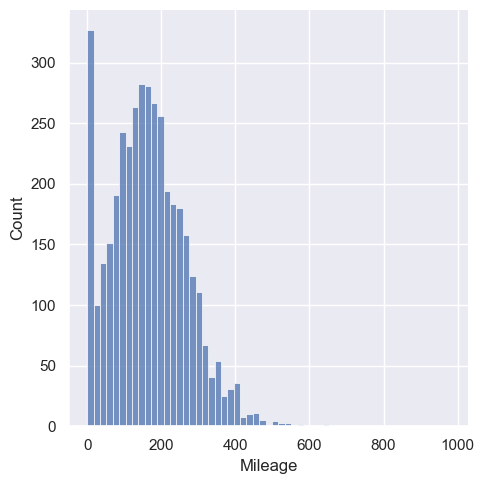

In [84]:
seaborn.displot(data_1["Mileage"])

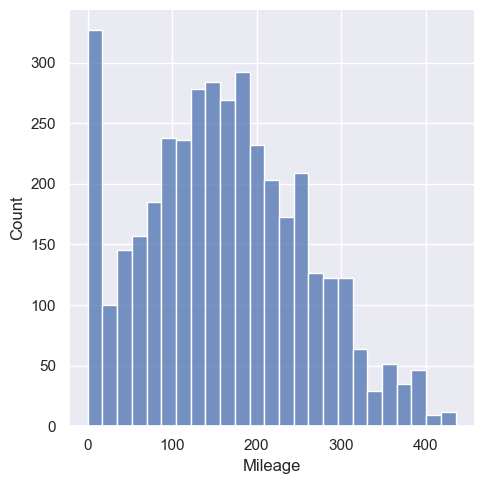

In [96]:
data_2 = data_1[data_1["Mileage"]<data_1["Mileage"].quantile(0.99)]
seaborn.displot(data_2["Mileage"])

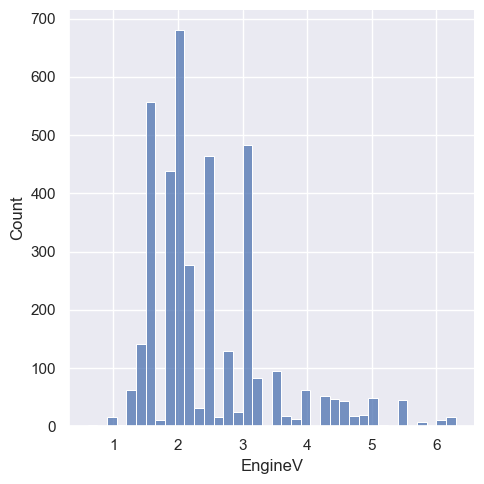

In [104]:
data_3 = data_2[data_2["EngineV"]<6.5] # engine volume is very unlikely to be above 6.5 in the market we look at.
seaborn.displot(data_3["EngineV"])

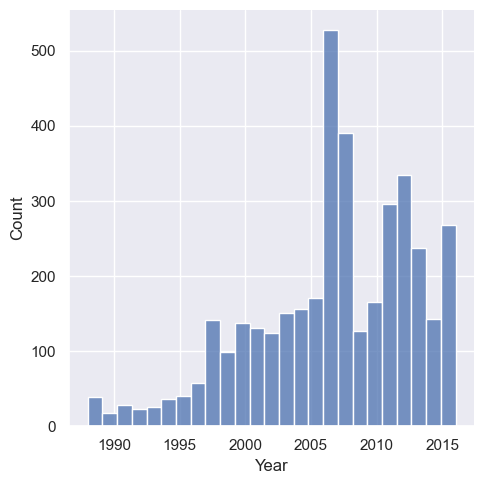

In [108]:
data_4 = data_3[data_3["Year"]>data_3["Year"].quantile(0.01)]
seaborn.displot(data_4["Year"])

### After Cleanup

After all null values and edge cases removed, we would like to have consistent data. 

For this reason, the old index has to go away since the removed rows result in jumps on the original index.

This is done by "reset_index" method in pandas, with "drop=True" as an argument.

In [113]:
data_cleaned = data_4.reset_index(drop=True)
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011
...,...,...,...,...,...,...,...,...
3862,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008
3863,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014
3864,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014
3865,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999


## Checking the OLS assumptions

### Plots

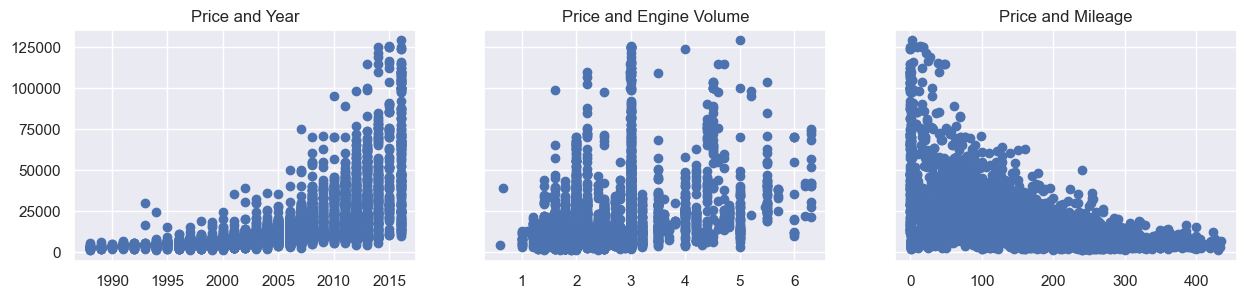

In [135]:
f, (ax1, ax2, ax3) = plt.subplots(1,3, sharey=True, figsize = (15,3))
ax1.scatter(data_cleaned["Year"],data_cleaned["Price"])
ax1.set_title("Price and Year")
ax2.scatter(data_cleaned["EngineV"],data_cleaned["Price"])
ax2.set_title("Price and Engine Volume")
ax3.scatter(data_cleaned["Mileage"],data_cleaned["Price"])
ax3.set_title("Price and Mileage")
plt.show()

#### Year

Year increase causes the price to increase at an increasing speed =>
\begin{equation}
\frac{d(Price)}{d(Year)} \equiv ax + b \text{ for some } a>0
\end{equation}

Both year and mileage have a relation where the curvature is positive 

i.e. the first derivative of price is getting bigger as year and mileage increases:

\begin{equation}
    \frac{d^2(Price)}{d(Year)^2} > 0
\end{equation}

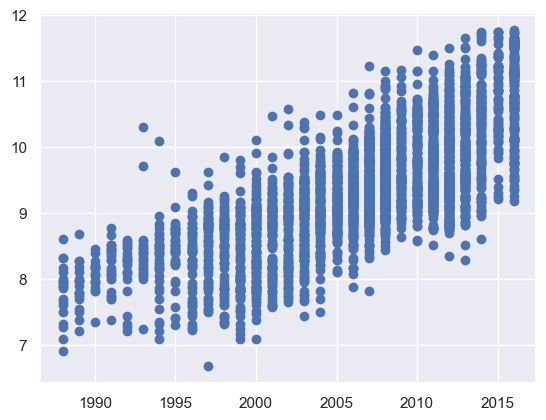

In [146]:
log_price = np.log(data_cleaned["Price"])
data_cleaned["Log Price"] = log_price
plt.scatter(data_cleaned["Year"],log_price)

Now it's much easier to set a linear regression between the "age" of the car and its "log price"

#### Log Price

Plot all scatter plots above but change the dependent variable to "Log Price":

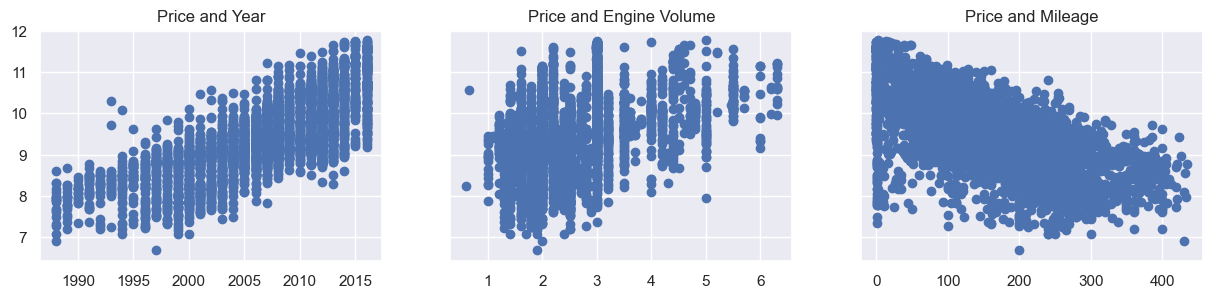

In [149]:
f, (ax1, ax2, ax3) = plt.subplots(1,3, sharey=True, figsize = (15,3))
ax1.scatter(data_cleaned["Year"],data_cleaned["Log Price"])
ax1.set_title("Price and Year")
ax2.scatter(data_cleaned["EngineV"],data_cleaned["Log Price"])
ax2.set_title("Price and Engine Volume")
ax3.scatter(data_cleaned["Mileage"],data_cleaned["Log Price"])
ax3.set_title("Price and Mileage")
plt.show()

Remove the OG price column since it's not much of use:

In [160]:
data_cleaned.drop(["Price"],axis=1)

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,Log Price
0,BMW,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...
3862,Volkswagen,van,163,2.5,Diesel,yes,2008,9.350102
3863,Toyota,sedan,35,1.6,Petrol,yes,2014,9.792556
3864,Mercedes-Benz,sedan,9,3.0,Diesel,yes,2014,11.736069
3865,BMW,sedan,1,3.5,Petrol,yes,1999,8.779557


## Multicollinearity

We expect a correlation between the age of the cars and their mileage. To check this, statsmodels library has a method called

"variance inflation factor".

In [164]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [170]:
vif_variables = data_cleaned[["Mileage","Year","EngineV"]]
vif = pd.DataFrame()
vif["Features"] = vif_variables.columns
vif["VIF"] = [variance_inflation_factor(vif_variables.values,i) for i in range(vif_variables.shape[1])] 
# the vif measurement will be done on each column and will be recorded in the vif dataframe
vif

,Features,VIF
0,Mileage,3.791584
1,Year,10.354854
2,EngineV,7.662068


The VIF measure takes values in $[1,\infty)$.
\begin{equation}
\begin{aligned}
\mathtt{VIF} = 1 & => \text{ No Multicollinearity } \\
1 < \mathtt{VIF} < 5 & => \text{ Manageable/Trivial Multicollinearity } \\
10^* < \mathtt{VIF} & => \text{ Not acceptable }
\end{aligned}
\end{equation}

Note: the value marked by * can be changed depending on the case

In [180]:
data_no_multicollinearity = data_cleaned.drop(["Year"],axis=1)
data_no_multicollinearity

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Log Price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,9.814656
...,...,...,...,...,...,...,...,...
3862,Volkswagen,11500.0,van,163,2.5,Diesel,yes,9.350102
3863,Toyota,17900.0,sedan,35,1.6,Petrol,yes,9.792556
3864,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,11.736069
3865,BMW,6500.0,sedan,1,3.5,Petrol,yes,8.779557


In [190]:
data_no_multicollinearity.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Log Price
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,NaN,9.415703
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,NaN,0.876616
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,6.684612
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,8.881836
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,9.367344
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,9.985068


In [206]:
pd.unique(data_no_multicollinearity["Brand"])

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

In [213]:
len(pd.unique(data_no_multicollinearity["Brand"]))

7

In [200]:
pd.unique(data_no_multicollinearity["Body"])

array(['sedan', 'van', 'crossover', 'vagon', 'other', 'hatch'],
      dtype=object)

In [202]:
pd.unique(data_no_multicollinearity["Engine Type"])

array(['Petrol', 'Diesel', 'Gas', 'Other'], dtype=object)

In [204]:
pd.unique(data_no_multicollinearity["Registration"])

array(['yes', 'no'], dtype=object)

## Dummy Variables

In [290]:
data_with_dummies = pd.get_dummies(data_no_multicollinearity, drop_first = True) 
#change drop_first to False if you want no categorization to be chosen as a "default" or "benchmark"
data_with_dummies

,Price,Mileage,EngineV,Log Price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,4200.0,277,2.0,8.342840,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True
1,7900.0,427,2.9,8.974618,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True
2,13300.0,358,5.0,9.495519,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True
3,23000.0,240,4.2,10.043249,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
4,18300.0,120,2.0,9.814656,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3862,11500.0,163,2.5,9.350102,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True
3863,17900.0,35,1.6,9.792556,False,False,False,False,True,False,False,False,True,False,False,False,False,True,True
3864,125000.0,9,3.0,11.736069,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True
3865,6500.0,1,3.5,8.779557,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True


Now, the cars with brand "audi", body "crossover", engine type "diesel" and registration "no" will be represented with no dummy variables:

\begin{equation}
    \mathtt{Log Price} = \mathtt{LogPriceAverage} + f_1(\mathtt{Mileage}) + f_2(\mathtt{EngineV}) 
\end{equation}

We represent the cars' log price with the model 
\begin{equation}
    \mathtt{Log Price} = \mathtt{Log Price Average} + f_1(\mathtt{Mileage}) + f_2(\mathtt{EngineV}) + \alpha_i + \beta_j + \gamma_k + \theta_l
\end{equation}
where $\alpha_i$ represent the variance in log price w.r. to each brand $i=1,2,...,len(pd.unique(data_no_multicollinearity["Brand"]))-1$,
$\beta_j$ represent the variance in log price w.r. to each body type $j=1,2,...,len(pd.unique(data_no_multicollinearity["Body"]))-1$,
$\gamma_k$ represent the variance in log price w.r. to each engine type $k=1,2,...,len(pd.unique(data_no_multicollinearity["Engine Type"]))-1$, and finally $\theta_l$ represent the variance in log price w.r. to each registration check $l=1,2,...,len(pd.unique(data_no_multicollinearity["Registration"])-1$.


## Preparing dummy variables for VIF calcs

#### Mapping True and False to binary values

In [292]:
data_with_dummies.columns.values

array(['Price', 'Mileage', 'EngineV', 'Log Price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [294]:
data_with_dummies.columns[4:]

Index(['Brand_BMW', 'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype='object')

In [296]:
data_with_dummies_2 = pd.DataFrame()
for it in data_with_dummies.columns[:4]:
    data_with_dummies_2[it] = data_with_dummies[it]
    
for it in data_with_dummies.columns[4:]:
    data_with_dummies_2[it] = data_with_dummies[it].map({True:1,False:0})
data_with_dummies_2

,Price,Mileage,EngineV,Log Price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,4200.0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,7900.0,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,13300.0,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,23000.0,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,18300.0,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3862,11500.0,163,2.5,9.350102,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
3863,17900.0,35,1.6,9.792556,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1
3864,125000.0,9,3.0,11.736069,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
3865,6500.0,1,3.5,8.779557,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1


In [304]:
vif_new_columns = data_with_dummies.columns.values
vif_new_columns

array(['Price', 'Mileage', 'EngineV', 'Log Price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [306]:
vif_variables = data_with_dummies_2[vif_new_columns[4:]]
vif = pd.DataFrame()
vif["Features"] = vif_variables.columns
vif["VIF"] = [variance_inflation_factor(vif_variables.values,i) for i in range(vif_variables.shape[1])] 
# the vif measurement will be done on each column and will be recorded in the vif dataframe
vif

,Features,VIF
0,Brand_BMW,1.937327
1,Brand_Mercedes-Benz,2.406580
2,Brand_Mitsubishi,1.602152
3,Brand_Renault,2.076883
4,Brand_Toyota,2.016385
5,Brand_Volkswagen,2.745884
6,Body_hatch,1.365711
7,Body_other,1.439575
8,Body_sedan,2.642114
9,Body_vagon,1.347685


As seen in the table above, only the registration variable is "potentially" problematic for multicollinearity, but not by much.

No columns will be removed.

## Reordering

*Will do manually

In [354]:
columns_new_order = ['Log Price', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']
data_preprocessed = data_with_dummies_2[columns_new_order]
data_preprocessed.head()

,Log Price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


## Standardisation 

### Declare regressors/features and target

In [356]:
target = data_preprocessed["Log Price"]
inputs = data_preprocessed.drop(["Log Price"],axis=1)

In [358]:
from sklearn.preprocessing import StandardScaler

In [360]:
scaler = StandardScaler()
scaler.fit(inputs)
scaled_inputs = scaler.transform(inputs)

## Train Test Split

In [458]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(scaled_inputs, target, test_size = 0.17, random_state = 42) 

# the function above is seperating values in scaled_inputs and target under the same index.
# if scaled_inputs[i] goes to x_train, then target[i] goes to y_train, for any i in range(len(scaled_inputs)).

## Model Fitting

In [364]:
model = LinearRegression()

In [366]:
model.fit(x_train,y_train)

LinearRegression()

In [368]:
model.coef_

array([-0.46338198,  0.21343085,  0.01213093,  0.00438746, -0.14094702,
       -0.18886135, -0.06401576, -0.09840635, -0.14541643, -0.09430235,
       -0.18735693, -0.11736919, -0.15905573, -0.11406373, -0.02600751,
       -0.14665024,  0.31486733])

In [370]:
model.intercept_

9.416611070828722

## Predictions made on training data

In [375]:
yhat = model.predict(x_train)

#### Plot of estimates against real data

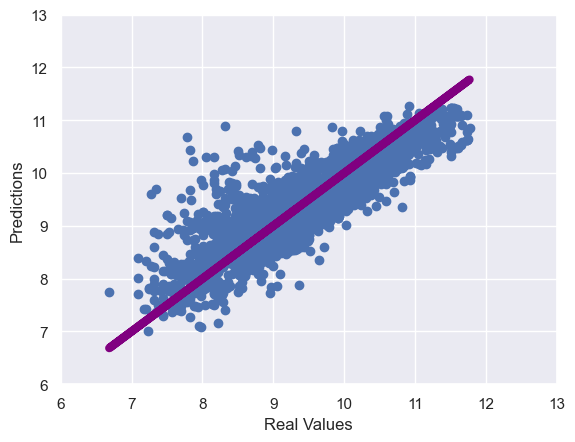

In [396]:
plt.scatter(y_train,yhat)
plt.xlabel("Real Values")
plt.ylabel("Predictions")
plt.xlim(6,13)
plt.ylim(6,13)
plt.plot(y_train,y_train,c="purple",lw=6)
plt.plot()
plt.show()

### Plot of Residuals

Text(0.5, 1.0, 'Residuals')

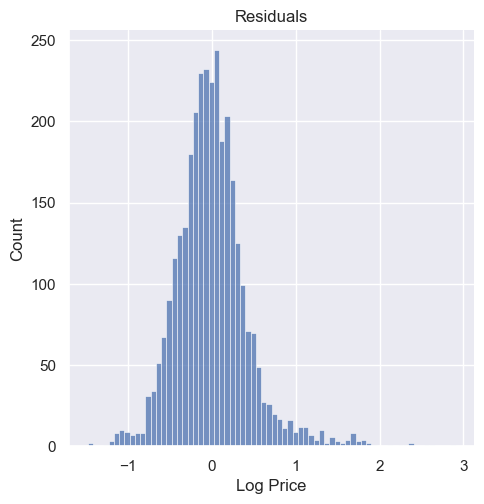

In [400]:
seaborn.displot(yhat - y_train)
plt.title("Residuals")

Error is normally distributed around 0 with a slight skew to the right, which means the estimate for some car prices are quite a bit higher than the actual price itself.

$R^2$ is

In [405]:
model.score(x_train,y_train)

0.7504190568193149

In [410]:
model_summary = pd.DataFrame(data=inputs.columns.values, columns=["Features"])
model_summary["Weights"] = model.coef_
model_summary

,Features,Weights
0,Mileage,-0.463382
1,EngineV,0.213431
2,Brand_BMW,0.012131
3,Brand_Mercedes-Benz,0.004387
4,Brand_Mitsubishi,-0.140947
5,Brand_Renault,-0.188861
6,Brand_Toyota,-0.064016
7,Brand_Volkswagen,-0.098406
8,Body_hatch,-0.145416
9,Body_other,-0.094302


## Predictions with Test Data

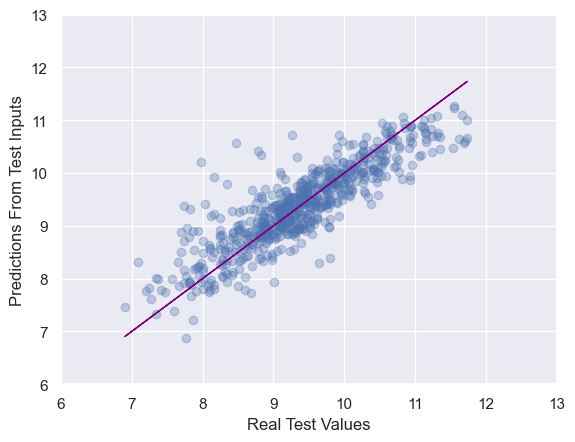

In [424]:
yhat_test = model.predict(x_test)
plt.scatter(y_test,yhat_test,alpha=0.3)
plt.xlabel("Real Test Values")
plt.ylabel("Predictions From Test Inputs")
plt.xlim(6,13)
plt.ylim(6,13)
plt.plot(y_test,y_test,c="purple",lw=1)
plt.plot()
plt.show()

A lot of clustering around the mid values, and less clustering around the cheaper and more expensive cars.

### Residuals from Test Data

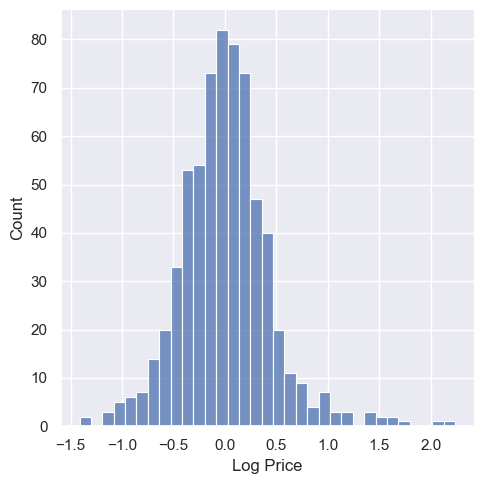

In [420]:
seaborn.displot(yhat_test - y_test)

## Model Performance Testing

In [462]:
df_model_perf = pd.DataFrame(np.exp(yhat_test),columns = ["Predictions"])
df_model_perf["Targets"] = np.exp(y_test.reset_index(drop=True))
df_model_perf["Residuals"] = (df_model_perf["Predictions"]-df_model_perf["Targets"])
df_model_perf["Difference in %"] = np.abs(df_model_perf["Residuals"]/df_model_perf["Targets"])*100
df_model_perf

,Predictions,Targets,Residuals,Difference in %
0,40449.604800,21300.0,19149.604800,89.904248
1,7894.625153,8900.0,-1005.374847,11.296347
2,5643.867130,3250.0,2393.867130,73.657450
3,9628.505670,12000.0,-2371.494330,19.762453
4,7086.930521,5400.0,1686.930521,31.239454
...,...,...,...,...
653,19979.359007,16800.0,3179.359007,18.924756
654,11628.225901,15900.0,-4271.774099,26.866504
655,14015.715878,30900.0,-16884.284122,54.641696
656,14816.433944,12000.0,2816.433944,23.470283


In [464]:
df_model_perf.describe()

,Predictions,Targets,Residuals,Difference in %
count,658.000000,658.000000,658.000000,658.000000
mean,15871.847385,17738.081657,-1866.234272,37.517517
std,12788.045842,19050.007744,11005.790074,64.035805
min,968.091097,999.000000,-82284.380935,0.032496
25%,7310.385291,6900.000000,-3256.102701,11.025295
50%,11864.696663,11475.000000,-22.861843,24.271280
75%,20358.591881,20375.000000,2115.584853,41.962003
max,78523.020145,125000.000000,34787.674745,837.400512


In [467]:
pd.options.display.max_rows = 999 # sets how many rows can be shown at once
pd.set_option("display.float_format", lambda x:"%.2f" % x) # sets floating point to be the second decimal
df_model_perf.sort_values(by=["Difference in %"])

,Predictions,Targets,Residuals,Difference in %
581,11503.74,11500.00,3.74,0.03
264,8703.77,8700.00,3.77,0.04
314,35523.80,35500.00,23.80,0.07
549,9010.92,9000.00,10.92,0.12
102,16972.81,16999.00,-26.19,0.15
648,9682.96,9700.00,-17.04,0.18
113,5016.80,5000.00,16.80,0.34
456,3885.17,3900.00,-14.83,0.38
262,51851.72,52055.25,-203.53,0.39
313,9840.35,9900.00,-59.65,0.60
